<a href="https://colab.research.google.com/github/drfperez/games/blob/main/Chess2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

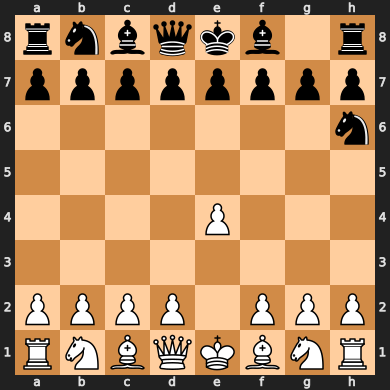

Text(value='', description='Moviment:', placeholder='Introdueix el teu moviment (ex: e2e4)')

In [3]:

# Instal·la les llibreries necessàries (aquesta línia només és necessària en Google Colab)
!pip install chess svgwrite cairosvg

# Importa les llibreries necessàries
import chess  # Llibreria per gestionar les regles del joc d'escacs
import chess.svg  # Llibreria per crear imatges del tauler d'escacs en format SVG
from IPython.display import SVG, display, clear_output  # Funcions per mostrar imatges SVG a Google Colab
import ipywidgets as widgets  # Llibreria per crear widgets interactius a Google Colab
import time  # Llibreria per gestionar pauses de temps

# Funció per a la IA senzilla que tria el primer moviment legal disponible
def fer_moviment_simple(tauler):
    # Obtenim tots els moviments legals que la IA pot fer
    moviments_legals = list(tauler.legal_moves)
    # Triem el primer moviment legal disponible
    moviment = moviments_legals[0]
    # Fem el moviment triat al tauler
    tauler.push(moviment)

# Dibuixa el tauler i les peces
def dibuixar_tauler(tauler):
    # Esborrem la sortida anterior
    clear_output(wait=True)
    # Creem una imatge del tauler en format SVG
    imatge_svg = chess.svg.board(tauler)
    # Mostrem la imatge SVG del tauler a la pantalla
    display(SVG(imatge_svg))

# Funció per gestionar el moviment del jugador
def moviment_jugador(tauler):
    # Crea un widget d'entrada per al moviment
    entrada_moviment = widgets.Text(
        description="Moviment:",
        placeholder="Introdueix el teu moviment (ex: e2e4)"
    )

    # Funció per gestionar la introducció del moviment
    def on_submit(change):
        moviment = change.value
        try:
            moviment_san = chess.Move.from_uci(moviment)
            if moviment_san in tauler.legal_moves:
                tauler.push(moviment_san)
                # Si el moviment és vàlid, sortim del bucle
                entrada_moviment.close()
                principal()
            else:
                print("Moviment no vàlid. Prova de nou.")
        except ValueError:
            print("Moviment no vàlid. Prova de nou.")

    entrada_moviment.on_submit(on_submit)
    display(entrada_moviment)

# Funció principal que gestionarà el joc
def principal():
    # Comprovem si el tauler existeix a la memòria global, sinó, el creem
    if 'tauler' not in globals():
        global tauler
        tauler = chess.Board()

    # Variable per controlar si el joc està en marxa
    en_curs = True

    # Bucle que continuarà fins que el joc acabi
    while en_curs:
        # Mostrem el tauler actualitzat
        dibuixar_tauler(tauler)

        # Comprovem si el joc ha acabat
        if tauler.is_game_over():
            # Si el joc ha acabat, mostrem un missatge indicant-ho
            print("Joc acabat!")
            # Mostrem el resultat del joc (qui ha guanyat o si és un empat)
            print(tauler.result())
            # Sortim del bucle perquè el joc ha acabat
            break

        # Si és el torn de les blanques (el jugador)
        if tauler.turn == chess.WHITE:
            # Moviment del jugador
            moviment_jugador(tauler)
            return  # Esperem que l'usuari introdueixi el moviment
        else:
            # Moviment de la IA senzilla
            fer_moviment_simple(tauler)

        # Afegim una pausa per veure el moviment
        time.sleep(1)

# Aquesta línia assegura que la funció principal s'executi quan el programa comenci
if __name__ == "__main__":
    principal()

# Com jugar:
# 1. Executa aquest codi a Google Colab.
# 2. Quan sigui el teu torn, introdueix el teu moviment utilitzant la notació algebraica (per exemple, 'e2e4') al widget d'entrada.
# 3. La IA farà un moviment automàticament.
# 4. El tauler es mostrarà després de cada moviment.
# 5. Continua jugant fins que el joc acabi.
# 6. Quan el joc acabi, es mostrarà el resultat (qui ha guanyat o si és un empat).

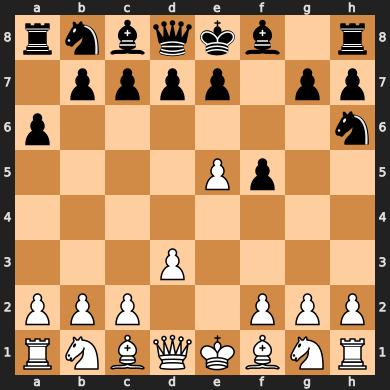

Text(value='', description='Moviment:', placeholder='Introdueix el teu moviment (ex: e2e4)')

In [4]:

# Instal·la les llibreries necessàries (aquesta línia només és necessària en Google Colab)
# !pip install chess svgwrite cairosvg

# Importa les llibreries necessàries
import chess  # Llibreria per gestionar les regles del joc d'escacs
import chess.svg  # Llibreria per crear imatges del tauler d'escacs en format SVG
from IPython.display import SVG, display, clear_output  # Funcions per mostrar imatges SVG a Google Colab
import ipywidgets as widgets  # Llibreria per crear widgets interactius a Google Colab
import random  # Llibreria per generar números i escollir elements de manera aleatòria
import time  # Llibreria per gestionar pauses de temps

# Funció per a la IA senzilla que tria un moviment legal aleatori
def fer_moviment_simple(tauler):
    # Obtenim tots els moviments legals que la IA pot fer
    moviments_legals = list(tauler.legal_moves)
    # Triem un moviment legal aleatori
    moviment = random.choice(moviments_legals)
    # Fem el moviment triat al tauler
    tauler.push(moviment)

# Dibuixa el tauler i les peces
def dibuixar_tauler(tauler):
    # Esborrem la sortida anterior
    clear_output(wait=True)
    # Creem una imatge del tauler en format SVG
    imatge_svg = chess.svg.board(tauler)
    # Mostrem la imatge SVG del tauler a la pantalla
    display(SVG(imatge_svg))

# Funció per gestionar el moviment del jugador
def moviment_jugador(tauler):
    # Crea un widget d'entrada per al moviment
    entrada_moviment = widgets.Text(
        description="Moviment:",
        placeholder="Introdueix el teu moviment (ex: e2e4)"
    )

    # Funció per gestionar la introducció del moviment
    def on_submit(change):
        moviment = change.value
        try:
            moviment_san = chess.Move.from_uci(moviment)
            if moviment_san in tauler.legal_moves:
                tauler.push(moviment_san)
                # Si el moviment és vàlid, sortim del bucle
                entrada_moviment.close()
                principal()
            else:
                print("Moviment no vàlid. Prova de nou.")
        except ValueError:
            print("Moviment no vàlid. Prova de nou.")

    entrada_moviment.on_submit(on_submit)
    display(entrada_moviment)

# Funció principal que gestionarà el joc
def principal():
    # Comprovem si el tauler existeix a la memòria global, sinó, el creem
    if 'tauler' not in globals():
        global tauler
        tauler = chess.Board()

    # Variable per controlar si el joc està en marxa
    en_curs = True

    # Bucle que continuarà fins que el joc acabi
    while en_curs:
        # Mostrem el tauler actualitzat
        dibuixar_tauler(tauler)

        # Comprovem si el joc ha acabat
        if tauler.is_game_over():
            # Si el joc ha acabat, mostrem un missatge indicant-ho
            print("Joc acabat!")
            # Mostrem el resultat del joc (qui ha guanyat o si és un empat)
            print(tauler.result())
            # Sortim del bucle perquè el joc ha acabat
            break

        # Si és el torn de les blanques (el jugador)
        if tauler.turn == chess.WHITE:
            # Moviment del jugador
            moviment_jugador(tauler)
            return  # Esperem que l'usuari introdueixi el moviment
        else:
            # Moviment de la IA senzilla
            fer_moviment_simple(tauler)

        # Afegim una pausa per veure el moviment
        time.sleep(1)

# Aquesta línia assegura que la funció principal s'executi quan el programa comenci
if __name__ == "__main__":
    principal()

# Com jugar:
# 1. Executa aquest codi a Google Colab.
# 2. Quan sigui el teu torn, introdueix el teu moviment utilitzant la notació algebraica (per exemple, 'e2e4') al widget d'entrada.
# 3. La IA farà un moviment automàticament.
# 4. El tauler es mostrarà després de cada moviment.
# 5. Continua jugant fins que el joc acabi.
# 6. Quan el joc acabi, es mostrarà el resultat (qui ha guanyat o si és un empat).

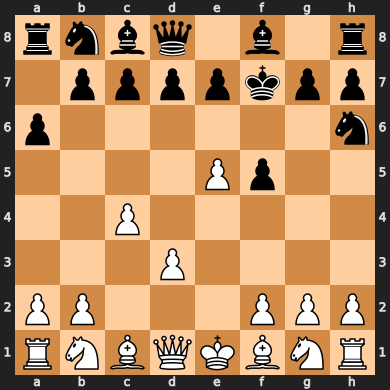

Text(value='', description='Moviment:', placeholder='Introdueix el teu moviment (ex: e2e4)')

In [5]:

# Instal·la les llibreries necessàries (aquesta línia només és necessària en Google Colab)
# !pip install chess svgwrite cairosvg

# Importa les llibreries necessàries
import chess  # Llibreria per gestionar les regles del joc d'escacs
import chess.svg  # Llibreria per crear imatges del tauler d'escacs en format SVG
from IPython.display import SVG, display, clear_output  # Funcions per mostrar imatges SVG a Google Colab
import ipywidgets as widgets  # Llibreria per crear widgets interactius a Google Colab
import random  # Llibreria per generar números i escollir elements de manera aleatòria
import time  # Llibreria per gestionar pauses de temps

# Variable per decidir quina IA utilitzar (True per `fer_moviment_millor`, False per `fer_moviment_simple`)
usar_moviment_millor = True

# Funció per a la IA senzilla que tria un moviment legal aleatori
def fer_moviment_simple(tauler):
    # Obtenim tots els moviments legals que la IA pot fer
    moviments_legals = list(tauler.legal_moves)
    # Triem un moviment legal aleatori
    moviment = random.choice(moviments_legals)
    # Fem el moviment triat al tauler
    tauler.push(moviment)

# Funció per a la IA que tria un moviment senzill amb alguna lògica
def fer_moviment_millor(tauler):
    # Obtenim tots els moviments legals que la IA pot fer
    moviments_legals = list(tauler.legal_moves)
    # Mirem si hi ha algun moviment que capturi una peça
    moviments_de_captura = [moviment for moviment in moviments_legals if tauler.is_capture(moviment)]
    if moviments_de_captura:
        # Si hi ha moviments de captura, triem un d'ells aleatòriament
        moviment = random.choice(moviments_de_captura)
    else:
        # Si no hi ha moviments de captura, triem un moviment legal aleatori
        moviment = random.choice(moviments_legals)
    # Fem el moviment triat al tauler
    tauler.push(moviment)

# Dibuixa el tauler i les peces
def dibuixar_tauler(tauler):
    # Esborrem la sortida anterior
    clear_output(wait=True)
    # Creem una imatge del tauler en format SVG
    imatge_svg = chess.svg.board(tauler)
    # Mostrem la imatge SVG del tauler a la pantalla
    display(SVG(imatge_svg))

# Funció per gestionar el moviment del jugador
def moviment_jugador(tauler):
    # Crea un widget d'entrada per al moviment
    entrada_moviment = widgets.Text(
        description="Moviment:",
        placeholder="Introdueix el teu moviment (ex: e2e4)"
    )

    # Funció per gestionar la introducció del moviment
    def on_submit(change):
        moviment = change.value
        try:
            moviment_san = chess.Move.from_uci(moviment)
            if moviment_san in tauler.legal_moves:
                tauler.push(moviment_san)
                # Si el moviment és vàlid, sortim del bucle
                entrada_moviment.close()
                principal()
            else:
                print("Moviment no vàlid. Prova de nou.")
        except ValueError:
            print("Moviment no vàlid. Prova de nou.")

    entrada_moviment.on_submit(on_submit)
    display(entrada_moviment)

# Funció principal que gestionarà el joc
def principal():
    # Comprovem si el tauler existeix a la memòria global, sinó, el creem
    if 'tauler' not in globals():
        global tauler
        tauler = chess.Board()

    # Variable per controlar si el joc està en marxa
    en_curs = True

    # Bucle que continuarà fins que el joc acabi
    while en_curs:
        # Mostrem el tauler actualitzat
        dibuixar_tauler(tauler)

        # Comprovem si el joc ha acabat
        if tauler.is_game_over():
            # Si el joc ha acabat, mostrem un missatge indicant-ho
            print("Joc acabat!")
            # Mostrem el resultat del joc (qui ha guanyat o si és un empat)
            print(tauler.result())
            # Sortim del bucle perquè el joc ha acabat
            break

        # Si és el torn de les blanques (el jugador)
        if tauler.turn == chess.WHITE:
            # Moviment del jugador
            moviment_jugador(tauler)
            return  # Esperem que l'usuari introdueixi el moviment
        else:
            # Moviment de la IA
            if usar_moviment_millor:
                fer_moviment_millor(tauler)
            else:
                fer_moviment_simple(tauler)

        # Afegim una pausa per veure el moviment
        time.sleep(1)

# Aquesta línia assegura que la funció principal s'executi quan el programa comenci
if __name__ == "__main__":
    principal()

# Com jugar:
# 1. Executa aquest codi a Google Colab.
# 2. Quan sigui el teu torn, introdueix el teu moviment utilitzant la notació algebraica (per exemple, 'e2e4') al widget d'entrada.
# 3. La IA farà un moviment automàticament.
# 4. El tauler es mostrarà després de cada moviment.
# 5. Continua jugant fins que el joc acabi.
# 6. Quan el joc acabi, es mostrarà el resultat (qui ha guanyat o si és un empat).

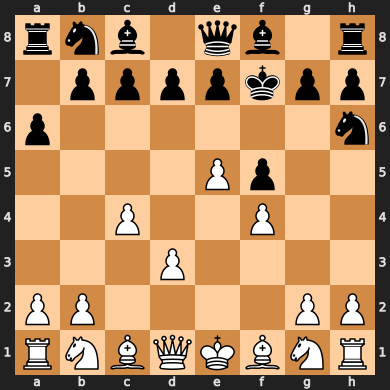

Text(value='', description='Moviment:', placeholder='Introdueix el teu moviment (ex: e2e4)')

In [6]:

# Instal·la les llibreries necessàries (aquesta línia només és necessària en Google Colab)
# !pip install chess svgwrite cairosvg

# Importa les llibreries necessàries
import chess  # Llibreria per gestionar les regles del joc d'escacs
import chess.svg  # Llibreria per crear imatges del tauler d'escacs en format SVG
from IPython.display import SVG, display, clear_output  # Funcions per mostrar imatges SVG a Google Colab
import ipywidgets as widgets  # Llibreria per crear widgets interactius a Google Colab
import random  # Llibreria per generar números i escollir elements de manera aleatòria
import time  # Llibreria per gestionar pauses de temps

# Valor de les peces
VALOR_PECES = {
    chess.PAWN: 1,
    chess.KNIGHT: 3,
    chess.BISHOP: 3,
    chess.ROOK: 5,
    chess.QUEEN: 9,
    chess.KING: 0
}

# Funció per avaluar un moviment
def avaluar_moviment(tauler, moviment):
    tauler.push(moviment)
    valor = 0
    if tauler.is_checkmate():
        valor = float('inf')  # Si el moviment resulta en escac i mat, és el millor moviment possible
    elif tauler.is_check():
        valor += 50  # Valorem molt positivament posar l'oponent en escac
    else:
        peça_capturada = tauler.piece_at(moviment.to_square)
        if peça_capturada:
            valor += VALOR_PECES[peça_capturada.piece_type]

    valor += random.uniform(0, 1)  # Afegim un petit factor aleatori per evitar moviments massa repetitius
    tauler.pop()
    return valor

# Funció per a la IA que tria el millor moviment segons una heurística simple
def fer_moviment_millor(tauler):
    # Obtenim tots els moviments legals que la IA pot fer
    moviments_legals = list(tauler.legal_moves)
    # Avaluem tots els moviments i escollim el millor
    millor_moviment = max(moviments_legals, key=lambda moviment: avaluar_moviment(tauler, moviment))
    # Fem el moviment triat al tauler
    tauler.push(millor_moviment)

# Dibuixa el tauler i les peces
def dibuixar_tauler(tauler):
    # Esborrem la sortida anterior
    clear_output(wait=True)
    # Creem una imatge del tauler en format SVG
    imatge_svg = chess.svg.board(tauler)
    # Mostrem la imatge SVG del tauler a la pantalla
    display(SVG(imatge_svg))

# Funció per gestionar el moviment del jugador
def moviment_jugador(tauler):
    # Crea un widget d'entrada per al moviment
    entrada_moviment = widgets.Text(
        description="Moviment:",
        placeholder="Introdueix el teu moviment (ex: e2e4)"
    )

    # Funció per gestionar la introducció del moviment
    def on_submit(change):
        moviment = change.value
        try:
            moviment_san = chess.Move.from_uci(moviment)
            if moviment_san in tauler.legal_moves:
                tauler.push(moviment_san)
                # Si el moviment és vàlid, sortim del bucle
                entrada_moviment.close()
                principal()
            else:
                print("Moviment no vàlid. Prova de nou.")
        except ValueError:
            print("Moviment no vàlid. Prova de nou.")

    entrada_moviment.on_submit(on_submit)
    display(entrada_moviment)

# Funció principal que gestionarà el joc
def principal():
    # Comprovem si el tauler existeix a la memòria global, sinó, el creem
    if 'tauler' not in globals():
        global tauler
        tauler = chess.Board()

    # Variable per controlar si el joc està en marxa
    en_curs = True

    # Bucle que continuarà fins que el joc acabi
    while en_curs:
        # Mostrem el tauler actualitzat
        dibuixar_tauler(tauler)

        # Comprovem si el joc ha acabat
        if tauler.is_game_over():
            # Si el joc ha acabat, mostrem un missatge indicant-ho
            print("Joc acabat!")
            # Mostrem el resultat del joc (qui ha guanyat o si és un empat)
            print(tauler.result())
            # Sortim del bucle perquè el joc ha acabat
            break

        # Si és el torn de les blanques (el jugador)
        if tauler.turn == chess.WHITE:
            # Moviment del jugador
            moviment_jugador(tauler)
            return  # Esperem que l'usuari introdueixi el moviment
        else:
            # Moviment de la IA
            fer_moviment_millor(tauler)

        # Afegim una pausa per veure el moviment
        time.sleep(1)

# Aquesta línia assegura que la funció principal s'executi quan el programa comenci
if __name__ == "__main__":
    principal()

# Com jugar:
# 1. Executa aquest codi a Google Colab.
# 2. Quan sigui el teu torn, introdueix el teu moviment utilitzant la notació algebraica (per exemple, 'e2e4') al widget d'entrada.
# 3. La IA farà un moviment automàticament.
# 4. El tauler es mostrarà després de cada moviment.
# 5. Continua jugant fins que el joc acabi.
# 6. Quan el joc acabi, es mostrarà el resultat (qui ha guanyat o si és un empat).

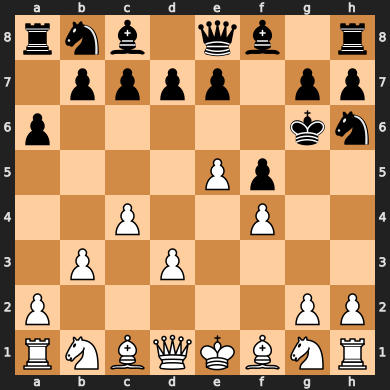

Text(value='', description='Moviment:', placeholder='Introdueix el teu moviment (ex: e2e4)')

In [7]:

# Instal·la les llibreries necessàries (aquesta línia només és necessària en Google Colab)
# !pip install chess svgwrite cairosvg

# Importa les llibreries necessàries
import chess  # Llibreria per gestionar les regles del joc d'escacs
import chess.svg  # Llibreria per crear imatges del tauler d'escacs en format SVG
from IPython.display import SVG, display, clear_output  # Funcions per mostrar imatges SVG a Google Colab
import ipywidgets as widgets  # Llibreria per crear widgets interactius a Google Colab
import random  # Llibreria per generar números i escollir elements de manera aleatòria
import time  # Llibreria per gestionar pauses de temps

# Valor de les peces
VALOR_PECES = {
    chess.PAWN: 1,
    chess.KNIGHT: 3,
    chess.BISHOP: 3,
    chess.ROOK: 5,
    chess.QUEEN: 9,
    chess.KING: 200  # Donem un valor alt al rei per reflectir la seva importància
}

# Funció per avaluar un moviment
def avaluar_moviment(tauler, moviment):
    tauler.push(moviment)
    valor = 0

    if tauler.is_checkmate():
        valor = float('inf')  # Si el moviment resulta en escac i mat, és el millor moviment possible
    elif tauler.is_check():
        valor += 50  # Valorem molt positivament posar l'oponent en escac
    else:
        peça_capturada = tauler.piece_at(moviment.to_square)
        if peça_capturada:
            valor += VALOR_PECES[peça_capturada.piece_type]

    # Prioritzem moviments centrals
    centre_squares = [chess.D4, chess.D5, chess.E4, chess.E5]
    if moviment.to_square in centre_squares:
        valor += 1

    # Desenvolupament de peces menors
    peça_movent = tauler.piece_at(moviment.from_square)
    if peça_movent and peça_movent.piece_type in [chess.KNIGHT, chess.BISHOP]:
        valor += 0.5

    valor += random.uniform(0, 0.1)  # Afegim un petit factor aleatori per evitar moviments massa repetitius
    tauler.pop()
    return valor

# Funció per a la IA que tria el millor moviment segons una heurística simple
def fer_moviment_millor(tauler):
    # Obtenim tots els moviments legals que la IA pot fer
    moviments_legals = list(tauler.legal_moves)
    # Avaluem tots els moviments i escollim el millor
    millor_moviment = max(moviments_legals, key=lambda moviment: avaluar_moviment(tauler, moviment))
    # Fem el moviment triat al tauler
    tauler.push(millor_moviment)

# Dibuixa el tauler i les peces
def dibuixar_tauler(tauler):
    # Esborrem la sortida anterior
    clear_output(wait=True)
    # Creem una imatge del tauler en format SVG
    imatge_svg = chess.svg.board(tauler)
    # Mostrem la imatge SVG del tauler a la pantalla
    display(SVG(imatge_svg))

# Funció per gestionar el moviment del jugador
def moviment_jugador(tauler):
    # Crea un widget d'entrada per al moviment
    entrada_moviment = widgets.Text(
        description="Moviment:",
        placeholder="Introdueix el teu moviment (ex: e2e4)"
    )

    # Funció per gestionar la introducció del moviment
    def on_submit(change):
        moviment = change.value
        try:
            moviment_san = chess.Move.from_uci(moviment)
            if moviment_san in tauler.legal_moves:
                tauler.push(moviment_san)
                # Si el moviment és vàlid, sortim del bucle
                entrada_moviment.close()
                principal()
            else:
                print("Moviment no vàlid. Prova de nou.")
        except ValueError:
            print("Moviment no vàlid. Prova de nou.")

    entrada_moviment.on_submit(on_submit)
    display(entrada_moviment)

# Funció principal que gestionarà el joc
def principal():
    # Comprovem si el tauler existeix a la memòria global, sinó, el creem
    if 'tauler' not in globals():
        global tauler
        tauler = chess.Board()

    # Variable per controlar si el joc està en marxa
    en_curs = True

    # Bucle que continuarà fins que el joc acabi
    while en_curs:
        # Mostrem el tauler actualitzat
        dibuixar_tauler(tauler)

        # Comprovem si el joc ha acabat
        if tauler.is_game_over():
            # Si el joc ha acabat, mostrem un missatge indicant-ho
            print("Joc acabat!")
            # Mostrem el resultat del joc (qui ha guanyat o si és un empat)
            print(tauler.result())
            # Sortim del bucle perquè el joc ha acabat
            break

        # Si és el torn de les blanques (el jugador)
        if tauler.turn == chess.WHITE:
            # Moviment del jugador
            moviment_jugador(tauler)
            return  # Esperem que l'usuari introdueixi el moviment
        else:
            # Moviment de la IA
            fer_moviment_millor(tauler)

        # Afegim una pausa per veure el moviment
        time.sleep(1)

# Aquesta línia assegura que la funció principal s'executi quan el programa comenci
if __name__ == "__main__":
    principal()

# Com jugar:
# 1. Executa aquest codi a Google Colab.
# 2. Quan sigui el teu torn, introdueix el teu moviment utilitzant la notació algebraica (per exemple, 'e2e4') al widget d'entrada.
# 3. La IA farà un moviment automàticament.
# 4. El tauler es mostrarà després de cada moviment.
# 5. Continua jugant fins que el joc acabi.
# 6. Quan el joc acabi, es mostrarà el resultat (qui ha guanyat o si és un empat).